# Load Data



In [ ]:
from google.colab import drive
import pathlib
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!nvidia-smi

Mon Dec 12 22:30:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    31W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
drive = pathlib.Path('./drive/MyDrive') / 'ML_Project' / 'ML_FP_2022'

In [ ]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import torch.nn as nn
import cv2
import random
import torchvision.transforms as transforms
from torch.utils import data
from torch.nn import functional as F
from torchvision import models
import matplotlib.pyplot as plt
import pandas as pd
import torchvision
import numpy as np
import torch.optim as optim
import torchvision.datasets as td
from torchvision import transforms
from PIL import Image
from skimage.feature import hog as hog
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix,f1_score
import pickle

In [ ]:
torch.cuda.is_available()

True

In [ ]:
##label for train,evaluate,test set###  int
with open(drive / "data2022" / "multi-task" / "label_v1" / "eval_label.pickle", 'rb') as pickle_file:
  eval_ = pickle.load(pickle_file)
pickle_file.close()

with open(drive / "data2022" / "multi-task" / "label_v1" / "test_label.pickle", 'rb') as pickle_file:
  test_ = pickle.load(pickle_file)
pickle_file.close()

with open(drive / "data2022" / "multi-task" / "label_v1" / "train_label.pickle", 'rb') as pickle_file:
  train_ = pickle.load(pickle_file)
pickle_file.close()

ground_truth = train_['creator']
evaluate_truth= eval_['creator']
test_truth= test_['creator']

from sklearn.preprocessing import LabelEncoder

labels = list(set(ground_truth+evaluate_truth+test_truth))
encoder = LabelEncoder()
encoder.fit(labels)

ground_truth = encoder.transform(ground_truth)
evaluate_truth = encoder.transform(evaluate_truth)
test_truth = encoder.transform(test_truth)

In [ ]:
train_

In [ ]:
len(labels)

15

In [ ]:
len(ground_truth)

10682

In [ ]:
len(evaluate_truth)

1526

In [ ]:
len(test_truth)

3053

In [ ]:
###define a train loader###
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256,256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train_['identifier']

In [ ]:


class train_set(data.Dataset):
  def __init__ (self,root_path= drive / 'data2022'):
    self.image=[]
    self.label=ground_truth

    for i,c in enumerate(train_['identifier']):
      ###(H,W,C)###
      img = cv2.imread(os.path.join(root_path, "multi-task/data/train set new", c))
      self.image.append(img)

  def __len__(self):
    return len(self.label)

  def __getitem__(self, index):
     image=self.image[index]
     label=float(self.label[index])
     #pil_image=Image.fromarray(image.astype(np.uint8))

     output=preprocess(image)
     return output,label

#drive = pathlib.Path('./drive/MyDrive') / 'ML_Project' / 'Artwork-Detection-and-Style-Transfer-main'
Train_set=train_set()

In [ ]:
len(Train_set)==len(Train_set.image)
Train_set[1][0].shape
Train_set.label
#len(Train_set)

array([12,  9,  5, ..., 12,  6,  9])

In [ ]:
###define evaluate_loader###
class evaluate_set(data.Dataset):
  def __init__ (self,root_path= drive / 'data2022'):
    self.image=[]
    self.label=evaluate_truth

    for i in eval_['identifier']:
      ###(H,W,C)###
      img = cv2.imread(os.path.join(root_path, "multi-task/data/eval set", i))
      self.image.append(img)

  def __len__(self):
    return len(self.label)

  def __getitem__(self, index):
     image=self.image[index]
     label=float(self.label[index])

     output=preprocess(image)
     return output,label

evaluate_set = evaluate_set()

In [ ]:
len(evaluate_set)==len(evaluate_set.image)
len(evaluate_set)

1526

In [ ]:
###define test loader###
class test_set(data.Dataset):
  def __init__ (self,root_path= drive / 'data2022'):
    self.image=[]
    self.label=test_truth

    for i in test_['identifier']:
      ###(H,W,C)###
      img = cv2.imread(os.path.join(root_path, "multi-task/data/test set", i))
      self.image.append(img)
      print(i)

  def __len__(self):
    return len(self.label)

  def __getitem__(self, index):
     image=self.image[index]
     label=float(self.label[index])

     output=preprocess(image)
     return output,label
  
test_set=test_set()

RP-P-OB-4826.jpg
RP-P-OB-20.926.jpg
BK-17473-105.jpg
RP-P-OB-10.134.jpg
RP-P-1896-A-19368-772.jpg
RP-P-OB-52.697.jpg
RP-P-1960-416.jpg
RP-P-1896-A-19368-80.jpg
RP-P-1896-A-19368-559.jpg
RP-P-1904-3440.jpg
BK-17474-97.jpg
RP-P-OB-82.034.jpg
RP-P-OB-48.739.jpg
RP-P-1909-526.jpg
RP-P-1890-A-16071.jpg
RP-P-OB-44.520.jpg
RP-P-1907-3836.jpg
RP-P-OB-56.837.jpg
RP-P-1894-A-18381.jpg
RP-T-1884-A-411.jpg
RP-P-OB-78.783.jpg
RP-P-1906-2505.jpg
RP-P-OB-51.708.jpg
RP-P-OB-4674.jpg
RP-P-OB-84.475.jpg
RP-P-1905-827.jpg
BI-B-FM-005-56.jpg
RP-P-OB-78.735.jpg
RP-P-OB-81.810.jpg
BK-17381-A.jpg
RP-P-1909-2769.jpg
RP-P-1983-116.jpg
RP-P-1896-A-19368-882.jpg
RP-P-BI-6058.jpg
RP-P-1963-288.jpg
RP-P-OB-44.131.jpg
RP-P-1910-1684.jpg
RP-P-OB-85.610.jpg
RP-P-1979-4.jpg
BK-17474-110.jpg
RP-P-OB-44.184.jpg
RP-P-OB-20.648.jpg
RP-P-1896-A-19368-495.jpg
RP-P-OB-4835.jpg
RP-P-OB-44.264.jpg
RP-P-1961-1082.jpg
RP-P-1904-470.jpg
RP-P-1933-55.jpg
RP-P-OB-4668.jpg
RP-P-1907-4246.jpg
RP-P-1985-238.jpg
RP-P-1896-A-19368-384.j

In [ ]:
len(test_set)==len(test_set.image)

True

torch.Size([3, 224, 224])


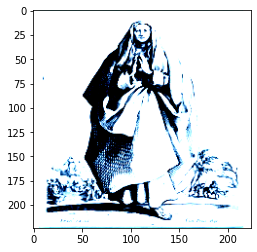

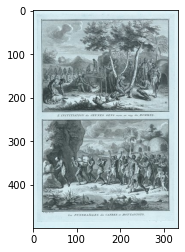

In [ ]:
###example of preprocess image and original image###
root_path= drive / 'data2022'
image,label=evaluate_set[1]
print(image.shape)
a=image.squeeze(0).numpy().transpose((1,2,0))
plt.imshow(a)
plt.show()
##(0-255) int###
c = train_['identifier'][0]
img = cv2.imread(os.path.join(root_path, "multi-task/data/train set new", c))
plt.imshow(img)
plt.show()
#a

In [ ]:
test_set

In [ ]:
###create related DataLoader###
train_loader=data.DataLoader(Train_set,batch_size=34,shuffle=True,drop_last=True,num_workers=2)
eva_loader=data.DataLoader(evaluate_set,batch_size=1,num_workers=2)
test_loader=data.DataLoader(test_set,batch_size=1,num_workers=2)

# Train Model

In [ ]:
###main train and evaluate function ###
def train_main(model,loss_fn,optimizer,train_loader,device):
  loss_epoch=[]
  for batchind,data in enumerate(train_loader):
    model.train()
    ##(b,c,h,w)
    images,label=data
    images = torch.Tensor(images).to(device)
    label = torch.Tensor(label).to(device)
    #print(images.shape)
    optimizer.zero_grad()
    outputs=model(images)
    ouputs=outputs.long()
    label=label.long()
    
    loss=loss_fn(outputs,label)
    loss_epoch.append(loss.item())

    loss.backward()
    optimizer.step()
  return loss_epoch

def evaluate_whole(model,evaluate_loader,evaluate_truth,device):
  predict_list=[]
  norm=nn.Softmax(1)
  model.eval()
  with torch.no_grad():
    for batchind,data in enumerate(evaluate_loader):
      images,label=data
      images = torch.Tensor(images).to(device)
      label = torch.Tensor(label).to(device).float()
      outputs=norm(model(images).detach().cpu()).numpy().ravel()
      predict_list.append(np.argmax(outputs))
      
  f1_c=f1_score(evaluate_truth,predict_list,average='micro')

  return predict_list,f1_c

# VGG

In [ ]:
##load pretrained VGG network ###
VGG=torch.hub.load('pytorch/vision:v0.8.2', 'vgg16', pretrained=True)
#VGG_new=nn.Sequential(*list(VGG.classifier.children())[:-1])
#VGG.classifier=VGG_new
#print(VGG)
VGG_new=nn.Sequential(
    *list(VGG.classifier.children())[:-1],
    nn.Linear(4096,15)
)
VGG.classifier=VGG_new
print(VGG)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.8.2
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
###make a test###
for p in VGG.features.children():
  for params in p.parameters():
    params.requires_grad=False

for name, params in VGG.named_parameters():
  if params.requires_grad:
    print(name)

classifier.0.weight
classifier.0.bias
classifier.3.weight
classifier.3.bias
classifier.6.weight
classifier.6.bias


In [ ]:
num_epoch=3
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=VGG.to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(filter(lambda p:p.requires_grad,model.parameters()),lr=1e-4)
#model.load_state_dict(torch.load(drive / "models" / "creator" / "VGG" / 'creator_model_paramenter_VGG_v2.txt'))
#state_dict = torch.load(drive / "models" / "creator" / "VGG" / 'creator_optimizer_paramenter_VGG_v2.txt')

In [ ]:
### main train function###
train_loss=[]
evaluate_score=[]
for i in range(num_epoch):
  loss=train_main(model,loss_fn,optimizer,train_loader, device)
  train_loss.append(np.mean(loss))
  predict_r,f1_r=evaluate_whole(model,eva_loader,evaluate_truth, device)
  evaluate_score.append(f1_r)
  print(f'epoch{i+1} has been trained')
#model.save(drive/"models")

epoch1 has been trained
epoch2 has been trained
epoch3 has been trained


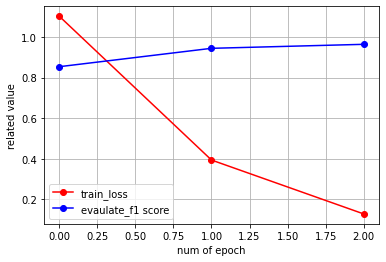

In [ ]:
### print train result and evaluation result###
plt.plot(train_loss,'o-r',label='train_loss')
plt.plot(evaluate_score,'o-b',label='evaulate_f1 score')
plt.xlabel('num of epoch')
plt.ylabel('related value')
plt.grid()
plt.legend()
plt.show()

In [ ]:
## the main test part ##
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,balanced_accuracy_score
def test_whole(model,test_loader,truth_label):
  predict_list=[]
  norm=nn.Softmax(1)
  model.eval()
  with torch.no_grad():
    for batchind,data in enumerate(test_loader):
      images,label=data
      ##change to (1,c,h,w)
      images = torch.Tensor(images).to(device)
      label = torch.Tensor(label).to(device).float()
      outputs=norm(model(images).detach().cpu()).numpy().ravel()
      predict_list.append(np.argmax(outputs))
  f1_c=f1_score(truth_label,predict_list,average='micro')
  recall = recall_score(truth_label,predict_list,average='micro')
  prec = precision_score(truth_label,predict_list,average='micro')
  mac = balanced_accuracy_score(truth_label,predict_list)
  con_mat=confusion_matrix(truth_label,predict_list)

  return predict_list,f1_c,recall,prec,mac,con_mat

truth=test_set.label
predict_label,f1,recall,prec,mac,mat=test_whole(model,test_loader,truth)

the micro f1 score on test set is 0.9528332787422208
the micro recall score on test set is 0.9528332787422208
the micro precision score on test set is 0.9528332787422208
the micro mean average precision score on test set is 0.9499203157890592


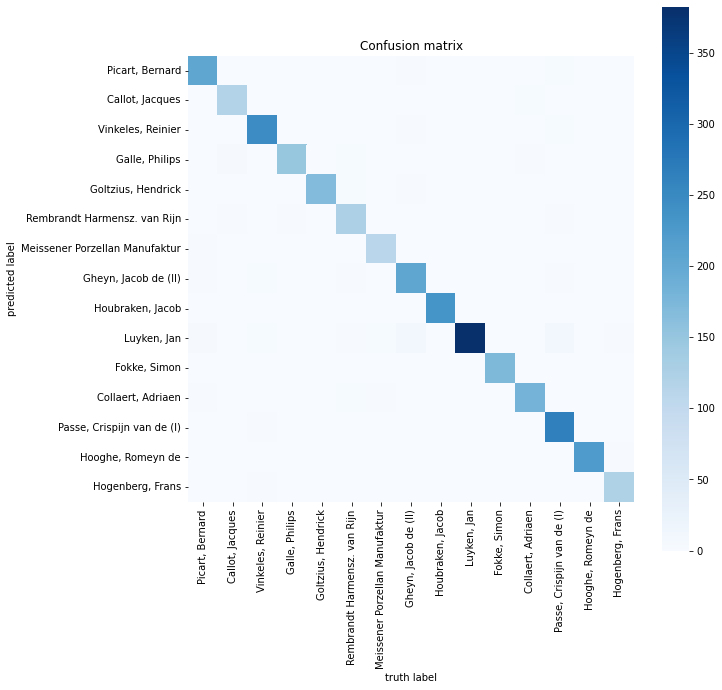

In [ ]:
print(f'the micro f1 score on test set is {f1}')
print(f'the micro recall score on test set is {recall}')
print(f'the micro precision score on test set is {prec}')
print(f'the micro mean average precision score on test set is {mac}')
label_name=list(set(encoder.inverse_transform(predict_label)))
fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
sns.heatmap(mat.T,square=True,fmt='d',cbar=True,xticklabels=label_name,yticklabels=label_name,cmap=plt.cm.Blues,ax=ax)
#plt.colorbar()
plt.ylabel('predicted label')
plt.xlabel('truth label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
###save model's paramenters###
root_path = drive / "models" / "creator" / "VGG"
path=os.path.join(root_path / 'creator_model_paramenter_VGG_v3.txt')
torch.save(model.state_dict(),path)

path2=os.path.join(root_path / 'creator_optimizer_paramenter_VGG_v3.txt')
torch.save(optimizer.state_dict(),path2)

# ResNet50

In [ ]:
##load pretrained resnet50 network ###
resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
resnet50=nn.Sequential(
    resnet50,
    nn.Linear(1000,15)
)
print(resnet50)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


Sequential(
  (0): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layers): Sequential(
      (0): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
        

In [ ]:
num_epoch=3
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=resnet50.to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(filter(lambda p:p.requires_grad,model.parameters()),lr=1e-4)
#model.load_state_dict(torch.load(drive / "models" / "creator" / "ResNet" / 'creator_model_paramenter_ResNet_v2.txt'))
#state_dict = torch.load(drive / "models" / "creator" / "ResNet" / 'creator_optimizer_paramenter_ResNet_v2.txt')

In [ ]:
train_loss=[]
evaluate_score=[]
for i in range(num_epoch):
  loss=train_main(model,loss_fn,optimizer,train_loader,device)
  train_loss.append(np.mean(loss))
  predict_r,f1_r=evaluate_whole(model,eva_loader,evaluate_truth,device)
  evaluate_score.append(f1_r)
  print(f'epoch{i+1} has been trained')

epoch1 has been trained
epoch2 has been trained
epoch3 has been trained


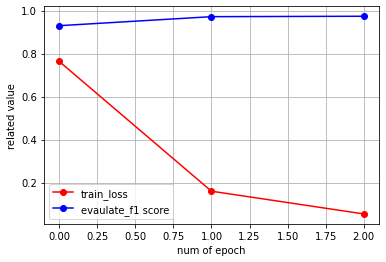

In [ ]:
### print train result and evaluation result###
plt.plot(train_loss,'o-r',label='train_loss')
plt.plot(evaluate_score,'o-b',label='evaulate_f1 score')
plt.xlabel('num of epoch')
plt.ylabel('related value')
plt.grid()
plt.legend()
plt.show()

In [ ]:
## the main test part ##
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,balanced_accuracy_score
def test_whole(model,test_loader,truth_label):
  predict_list=[]
  norm=nn.Softmax(1)
  model.eval()
  with torch.no_grad():
    for batchind,data in enumerate(test_loader):
      images,label=data
      ##change to (1,c,h,w)
      images = torch.Tensor(images).to(device)
      label = torch.Tensor(label).to(device).float()
      outputs=norm(model(images).detach().cpu()).numpy().ravel()
      predict_list.append(np.argmax(outputs))
  f1_c=f1_score(truth_label,predict_list,average='micro')
  recall = recall_score(truth_label,predict_list,average='micro')
  prec = precision_score(truth_label,predict_list,average='micro')
  mac = balanced_accuracy_score(truth_label,predict_list)
  con_mat=confusion_matrix(truth_label,predict_list)
  con_mat=confusion_matrix(truth_label,predict_list)

  return predict_list,f1_c,recall,prec,mac,con_mat

truth=test_set.label
predict_label,f1,recall,prec,mac,mat=test_whole(model,test_loader,truth)

the micro f1 score on test set is 0.967900425810678
the micro recall score on test set is 0.967900425810678
the micro precision score on test set is 0.967900425810678
the micro mean average precision score on test set is 0.9676207112322588


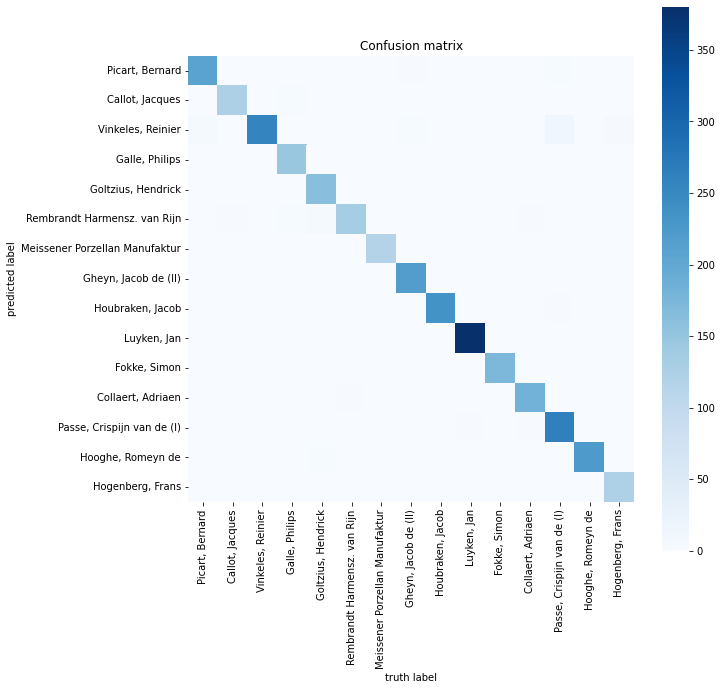

In [ ]:
print(f'the micro f1 score on test set is {f1}')
print(f'the micro recall score on test set is {recall}')
print(f'the micro precision score on test set is {prec}')
print(f'the micro mean average precision score on test set is {mac}')
label_name=list(set(encoder.inverse_transform(predict_label)))
fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
sns.heatmap(mat.T,square=True,fmt='d',cbar=True,xticklabels=label_name,yticklabels=label_name,cmap=plt.cm.Blues,ax=ax)
#plt.colorbar()
plt.ylabel('predicted label')
plt.xlabel('truth label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
###save model's paramenters###
root_path = drive / "models" / "creator" / "ResNet"
path=os.path.join(root_path / 'creator_model_paramenter_ResNet_v3.txt')
torch.save(model.state_dict(),path)

path2=os.path.join(root_path / 'creator_optimizer_paramenter_ResNet_v3.txt')
torch.save(optimizer.state_dict(),path2)

# AlexNet

In [ ]:
##load pretrained alexnet network ###
alexnet = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
alexnet=nn.Sequential(
    alexnet,
    nn.Linear(1000,15)
)
print(alexnet)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Sequential(
  (0): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False)
      (1):

In [ ]:
num_epoch=3
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=alexnet.to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(filter(lambda p:p.requires_grad,model.parameters()),lr=1e-4)

In [ ]:
train_loss=[]
evaluate_score=[]
for i in range(num_epoch):
  loss=train_main(model,loss_fn,optimizer,train_loader,device)
  train_loss.append(np.mean(loss))
  predict_r,f1_r=evaluate_whole(model,eva_loader,evaluate_truth,device)
  evaluate_score.append(f1_r)
  print(f'epoch{i+1} has been trained')

epoch1 has been trained
epoch2 has been trained
epoch3 has been trained


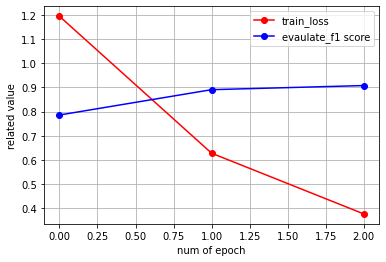

In [ ]:
### print train result and evaluation result###
plt.plot(train_loss,'o-r',label='train_loss')
plt.plot(evaluate_score,'o-b',label='evaulate_f1 score')
plt.xlabel('num of epoch')
plt.ylabel('related value')
plt.grid()
plt.legend()
plt.show()

In [ ]:
## the main test part ##
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score
def test_whole(model,test_loader,truth_label):
  predict_list=[]
  norm=nn.Softmax(1)
  model.eval()
  with torch.no_grad():
    for batchind,data in enumerate(test_loader):
      images,label=data
      ##change to (1,c,h,w)
      images = torch.Tensor(images).to(device)
      label = torch.Tensor(label).to(device).float()
      outputs=norm(model(images).detach().cpu()).numpy().ravel()
      predict_list.append(np.argmax(outputs))
  f1_c=f1_score(truth_label,predict_list,average='micro')
  recall = recall_score(truth_label,predict_list,average='micro')
  prec = precision_score(truth_label,predict_list,average='micro')
  mac = balanced_accuracy_score(truth_label,predict_list)
  con_mat=confusion_matrix(truth_label,predict_list)

  return predict_list,f1_c,recall,prec,mac,con_mat

truth=test_set.label
predict_label,f1,recall,prec,mac,mat=test_whole(model,test_loader,truth)

the micro f1 score on test set is 0.9014084507042254
the micro recall score on test set is 0.9014084507042254
the micro precision score on test set is 0.9014084507042254
the micro mean average precision score on test set is 0.8965368977316264


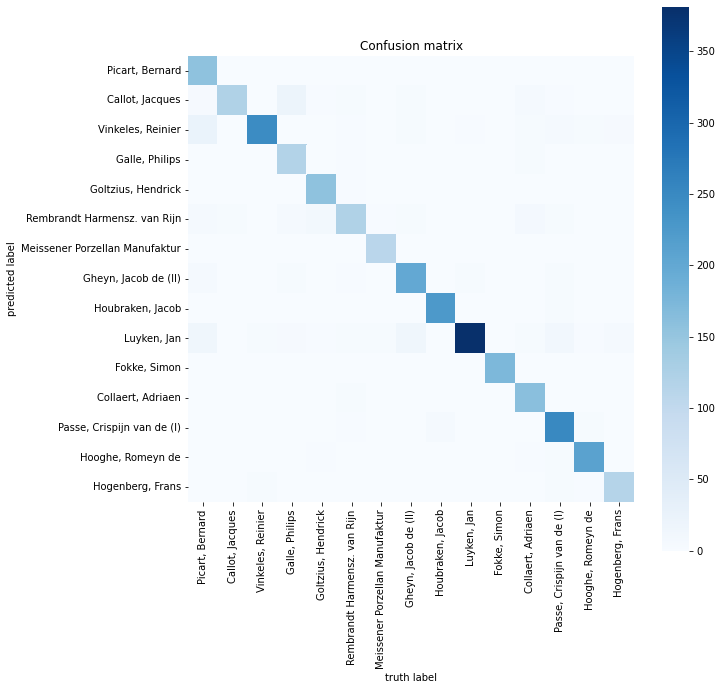

In [ ]:
print(f'the micro f1 score on test set is {f1}')
print(f'the micro recall score on test set is {recall}')
print(f'the micro precision score on test set is {prec}')
print(f'the micro mean average precision score on test set is {mac}')
#all_creators = np.unique(test_loader.data.label)
label_name=list(set(encoder.inverse_transform(predict_label)))
#label_name=list(set(encoder.inverse_transform(all_creators)))
fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
sns.heatmap(mat.T,square=True,fmt='d',cbar=True,xticklabels=label_name,yticklabels=label_name,cmap=plt.cm.Blues,ax=ax)
#plt.colorbar()
plt.ylabel('predicted label')
plt.xlabel('truth label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
###save model's paramenters###
root_path = drive / "models" / "creator" / "AlexNet"
path=os.path.join(root_path / 'creator_model_paramenter_AlexNet_v3.txt')
torch.save(model.state_dict(),path)

path2=os.path.join(root_path / 'creator_optimizer_paramenter_AlexNet_v3.txt')
torch.save(optimizer.state_dict(),path2)

# KNN

In [ ]:
### create knn data_loader and make related preprocess###
preprocess_knn = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256,256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class train_set_knn(data.Dataset):
  def __init__ (self,root_path= drive / 'data2022'):
    self.image=[]
    self.label=ground_truth

    for i,c in enumerate(train_['identifier']):
      ###(H,W,C)###
      img = cv2.imread(os.path.join(root_path, "multi-task/data/train set new", c))
      self.image.append(img)

  def __len__(self):
    return len(self.label)

  def __getitem__(self, index):
     image=self.image[index]
     label=float(self.label[index])
     #pil_image=Image.fromarray(image.astype(np.uint8))

     return preprocess_knn(image),label

class eva_set_knn(data.Dataset):
  def __init__ (self,root_path= drive / 'data2022'):
    self.image=[]
    self.label=evaluate_truth

    for i,c in enumerate(eval_['identifier']):
      ###(H,W,C)###
      img = cv2.imread(os.path.join(root_path, "multi-task/data/eval set", c))
      self.image.append(img)

  def __len__(self):
    return len(self.label)

  def __getitem__(self, index):
     image=self.image[index]
     label=self.label[index]
     #pil_image=Image.fromarray(image.astype(np.uint8))

     return preprocess_knn(image),label
class test_set_knn(data.Dataset):
  def __init__ (self,root_path= drive / 'data2022'):
    self.image=[]
    self.label=test_truth

    for i,c in enumerate(test_['identifier']):
      ###(H,W,C)###
      img = cv2.imread(os.path.join(root_path, "multi-task/data/test set", c))
      self.image.append(img)

  def __len__(self):
    return len(self.label)

  def __getitem__(self, index):
     image=self.image[index]
     label=self.label[index]
     #pil_image=Image.fromarray(image.astype(np.uint8))

     return preprocess_knn(image),label




In [ ]:
##construct 3 dataloader###
knn_train=train_set_knn()
knn_evaluate=eva_set_knn()
knn_test=test_set_knn()

In [ ]:
#a=hog(knn_train[1][0],multichannel=True)
#a.shape
c=np.transpose(knn_train[1][0].numpy(),(1,2,0))
type(c)
a=hog(c,multichannel=True)
a.shape
print(len(knn_test)==len(knn_test.label))

True


In [ ]:
#len(knn_train.image)==len(knn_train)
#len(knn_test.image)==len(knn_test)
###calculate hog features for KNN###

hog_train=np.zeros((10682,54756))
hog_eva=np.zeros((1526,54756))
hog_test=np.zeros((3053,54756))
knn_train[1][0].shape

for i in range(hog_train.shape[0]):
  hog_train[i,:]=hog(np.transpose(knn_train[i][0].numpy(),(1,2,0)),multichannel=True)

for j in range(hog_eva.shape[0]):
  hog_eva[j,:]=hog(np.transpose(knn_evaluate[j][0].numpy(),(1,2,0)),multichannel=True)

for k in range(hog_test.shape[0]):
  hog_test[k,:]=hog(np.transpose(knn_test[k][0].numpy(),(1,2,0)),multichannel=True)


In [ ]:
all_creators = np.unique(knn_test.label)

In [ ]:
hog_eval=np.zeros((1526,54756))
for i in range(hog_eval.shape[0]):
  hog_eval[i,:]=hog(np.transpose(knn_train[(i+927)][0].numpy(),(1,2,0)),multichannel=True)

In [ ]:
len([i for i in range(928,973)])
q=[i for i in range(928,973)]
q[-1]
z=[i for i in range(1,21)]
z[1:5]

[2, 3, 4, 5]

the best n_neighbors is 1


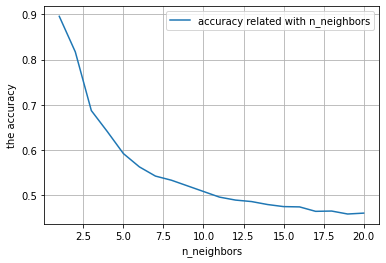

In [ ]:
### use evaluate set to find best hyperparameters###
mean_acc=[]
neighbor_list=[i for i in range(1,21)]
target=ground_truth
target_eval=evaluate_truth
for j in neighbor_list:
  KNN_model=KNeighborsClassifier(n_neighbors=j)
  KNN_model.fit(hog_train,target)
  mean_acc.append(KNN_model.score(hog_eva,target_eval))

plt.plot(neighbor_list,mean_acc,label='accuracy related with n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('the accuracy')
plt.grid()
plt.legend()
best_n=neighbor_list[np.argmax(mean_acc)]
print(f'the best n_neighbors is {best_n}')


In [ ]:
###KNN model performance###
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,balanced_accuracy_score

KNN_model=KNeighborsClassifier(n_neighbors=best_n)
KNN_model.fit(hog_train,target)
predict_list=KNN_model.predict(hog_test)

f1_c=f1_score(test_truth,predict_list,average='micro')
recall = recall_score(test_truth,predict_list,average='micro')
prec = precision_score(test_truth,predict_list,average='micro')
mac = balanced_accuracy_score(test_truth,predict_list)

con_mat=confusion_matrix(test_truth,predict_list)


print(f'the micro f1 score on test set is {f1_c}')
print(f'the micro recall score on test set is {recall}')
print(f'the micro precision score on test set is {prec}')
print(f'the micro mean average precision score on test set is {mac}')



label_name=list(set(encoder.inverse_transform(predict_list)))
all_creators = list(set(encoder.inverse_transform(all_creators)))
fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
sns.heatmap(con_mat.T,square=True,fmt='d',cbar=True,xticklabels=all_creators,yticklabels=all_creators,cmap=plt.cm.Blues,ax=ax)
#plt.colorbar()
plt.ylabel('predicted label')
plt.xlabel('truth label')
plt.title('Confusion matrix for KNN')
plt.show()